## Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(42)

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282585,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703086,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


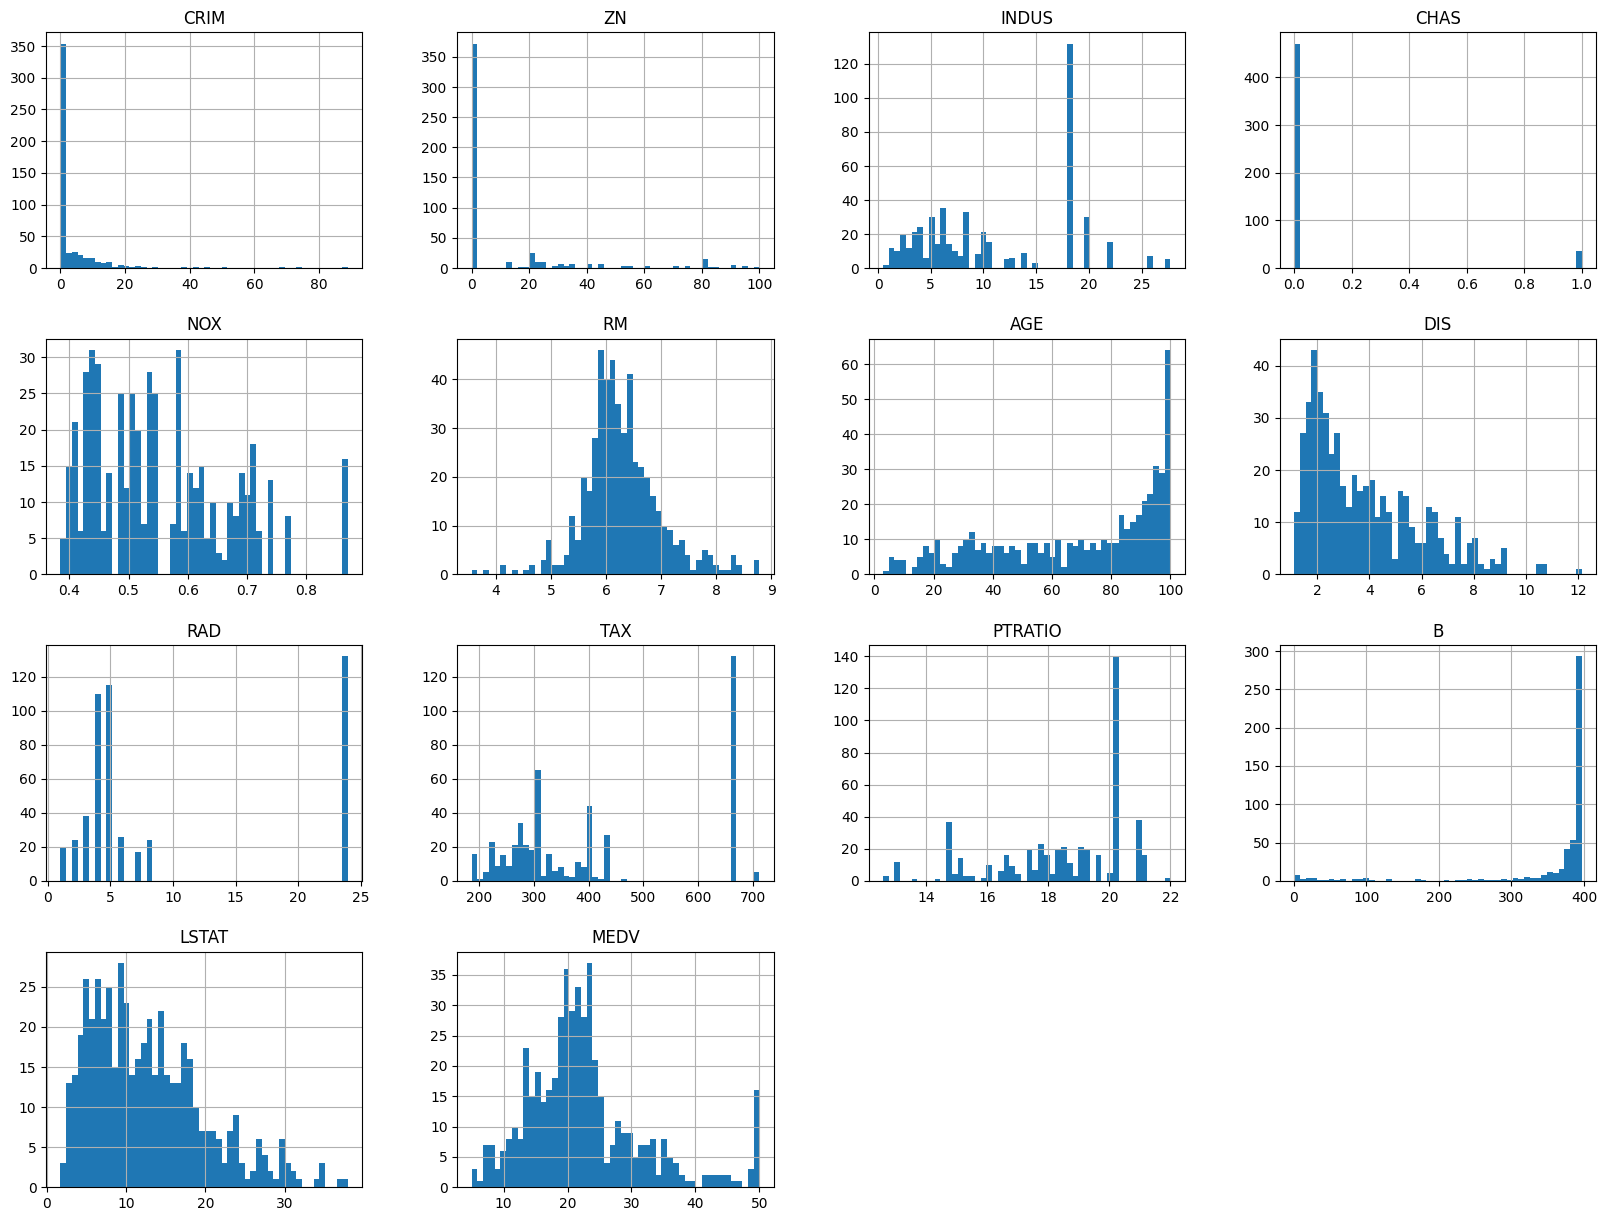

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Train-Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}")

Rows in train set: 404
Rows in test set:102


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [11]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [12]:
housing = strat_train_set.copy()

## Looking for Correlations

In [13]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.676223
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

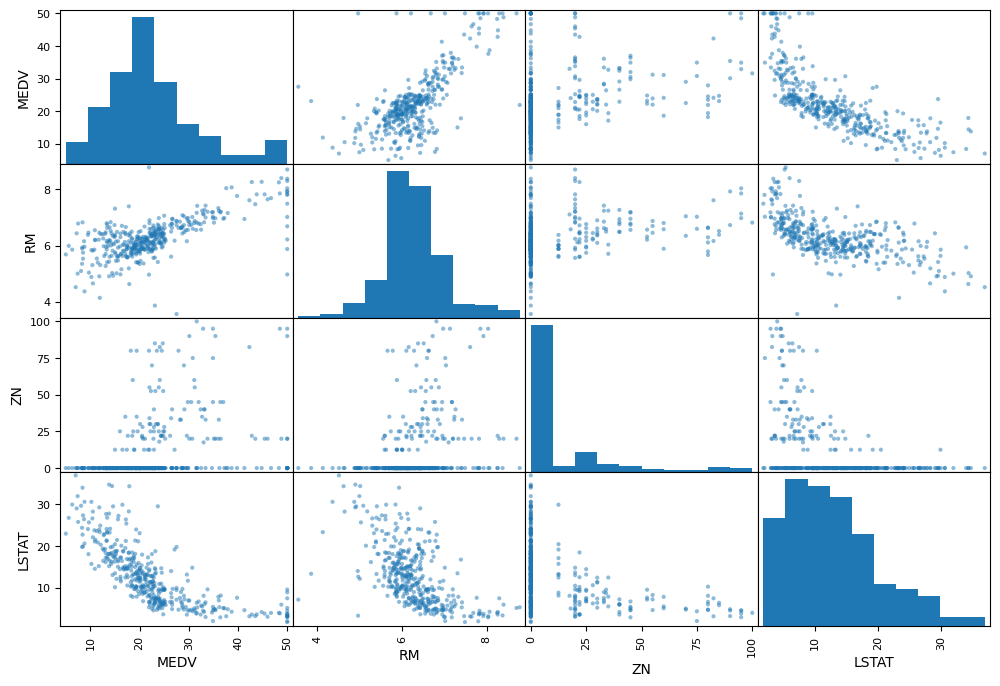

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

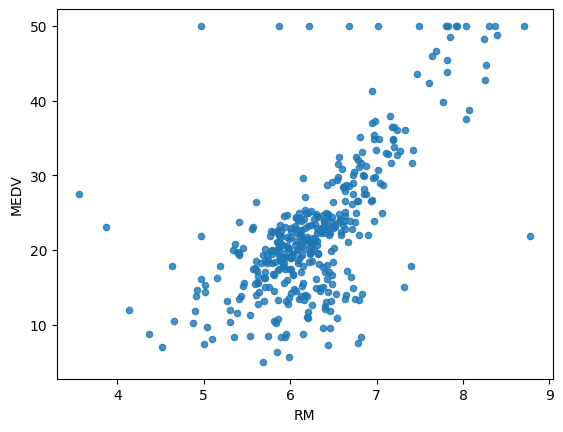

In [15]:
housing.plot(kind='scatter', x="RM", y='MEDV', alpha=0.8)

## Trying out Attribute combinations

In [16]:
housing["TaxPerRM"] = housing['TAX']/housing['RM']

In [17]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxPerRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [18]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.676223
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
PTRATIO    -0.493534
TaxPerRM   -0.521846
LSTAT      -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TaxPerRM', ylabel='MEDV'>

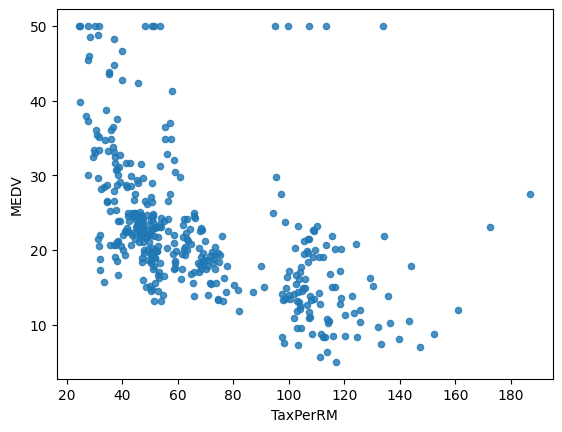

In [19]:
housing.plot(kind='scatter', x="TaxPerRM", y='MEDV', alpha=0.8)

In [20]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

### Missing attributes

In [21]:
median = housing['RM'].median()

In [22]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [25]:
X = imputer.transform(housing)

In [26]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [27]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276926,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709294,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),])

In [29]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [30]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
decision_tree_model = DecisionTreeRegressor()
linear_regression_model = LinearRegression()
random_forest_model = RandomForestRegressor()
from sklearn.metrics import mean_squared_error

## Evaluating the Model

#### Linear Regression

In [32]:
linear_regression_model.fit(housing_num_tr, housing_labels)
housing_predictions = linear_regression_model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.85899793647244

#### Decision Tree

In [33]:
decision_tree_model.fit(housing_num_tr, housing_labels)
housing_predictions = decision_tree_model.predict(housing_num_tr)
decision_tree_mse = mean_squared_error(housing_labels, housing_predictions)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_rmse

0.0

#### Random Forest

In [34]:
random_forest_model.fit(housing_num_tr, housing_labels)
housing_predictions = random_forest_model.predict(housing_num_tr)
random_forest_mse = mean_squared_error(housing_labels, housing_predictions)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_rmse

1.3282727683084152

## Using better evaluation technique - Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

#### Linear Regression

In [36]:
scores = cross_val_score(linear_regression_model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
print_scores(lin_rmse_scores)

Scores: [4.15734172 4.29190751 5.09330249 3.84075481 5.37693568 4.40539506
 7.55676569 5.63736938 4.1171657  6.05321914]
Mean:  5.0530157175382495
Standard Deviation:  1.089197370663861


#### Decision Tree

In [37]:
scores = cross_val_score(decision_tree_model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
decision_tree_scores = np.sqrt(-scores)
print_scores(decision_tree_scores)

Scores: [4.12266194 5.68635508 5.58929726 4.4324744  4.13796448 3.70300554
 7.42233117 5.14018482 3.46972621 4.04351332]
Mean:  4.774751422394121
Standard Deviation:  1.1389485205197358


#### Random Forest

In [38]:
scores = cross_val_score(random_forest_model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
random_forest_scores = np.sqrt(-scores)
print_scores(random_forest_scores)

Scores: [2.82844394 2.93745782 4.62958768 2.7703709  3.25520699 2.68726922
 4.86468335 3.66793884 2.96309692 3.57941412]
Mean:  3.418346978631084
Standard Deviation:  0.7358455406261211


## Saving the most efficient model

In [39]:
from joblib import dump, load
dump(random_forest_model, 'Real_estate.joblib')

['Real_estate.joblib']

## Testing the model on test data

In [40]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = random_forest_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_true=Y_test, y_pred=final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.917949069896492